In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1175,ham,Horrible u eat macs eat until u forgot abt me ...,NaN,NaN,NaN
1030,ham,Can not use foreign stamps in this country. Go...,NaN,NaN,NaN
5095,ham,K.k.this month kotees birthday know?,NaN,NaN,NaN
3202,ham,Haha... Yup hopefully we will lose a few kg b...,NaN,NaN,NaN
3973,ham,Roger that. WeÛ÷re probably going to rem in a...,NaN,NaN,NaN


# 1. Data Cleaning

In [4]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.sample(5)

,v1,v2
1143,ham,And is there a way you can send shade's stuff ...
1832,ham,What time is ur flight tmr?
5348,ham,Do I? I thought I put it back in the box
4131,ham,Hi baby ive just got back from work and i was ...
4203,ham,How are you enjoying this semester? Take care ...


In [6]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
2377,spam,YES! The only place in town to meet exciting a...
3158,ham,Are you up for the challenge? I know i am :)
4082,ham,"Good afternoon, my love. It was good to see yo..."
3154,ham,Ok...


In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# converting the target to 1 or 0
# 1 means spam and 0 means not spam
df['target']=df['target'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df['target'].value_counts()
# how many are spams and how many are not spams

target
0    4516
1     653
Name: count, dtype: int64

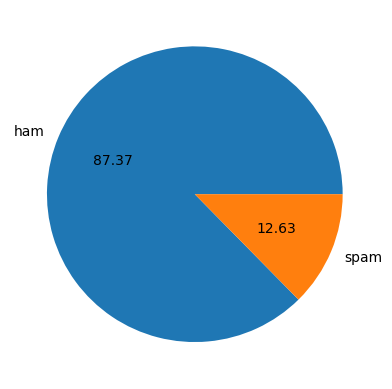

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
# number of characters
df['num_characters'] = df['text'].apply(len)

# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [18]:
# so on an average the number of characters,words,sentences are more in spam sms

# 3. Data Preprocessing

In [19]:
# lower case
# tokenization - convert the text to list of words
# remove special characters
# remove stop words and punctuation
# stemming

In [20]:
import nltk

In [21]:
from nltk.corpus import stopwords

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
import string

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [26]:
# definning a function which will do all these tasks
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): # if text is alphanumeric then only we append
            y.append(i)
    
    text = y[:]  # cloning the list
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  # removes the stop words and punctuations
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)  # return by converting it to string

In [27]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've c")

'gon na home soon want talk stuff anymor tonight k c'

In [28]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
# now we will make a wordcloud which will show the most frequent words in large and bold font

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

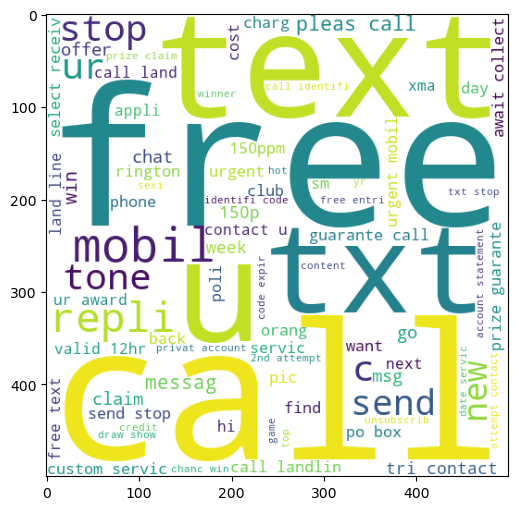

In [31]:
#wordcloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # combined tranformed text of all spams
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

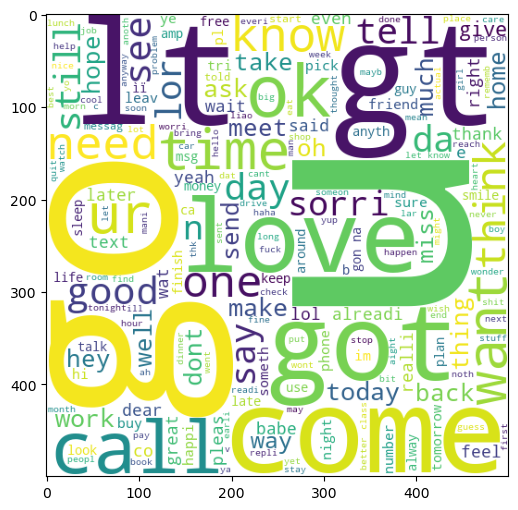

In [32]:
# wordcloud for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # combined the trannformed text of all ham
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# 4.Model Building

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [34]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [35]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X.shape

(5169, 6708)

In [37]:
# X is vector of transformed text of each row

In [38]:
y = df['target'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [43]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

In [44]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb
}

In [45]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [46]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0


In [47]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [48]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
0,SVC,0.972921,0.974138


In [49]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [50]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,SVC,Accuracy,0.972921
3,KN,Precision,1.000000
4,NB,Precision,1.000000
5,SVC,Precision,0.974138


In [51]:
import seaborn as sns

C:\Users\divya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


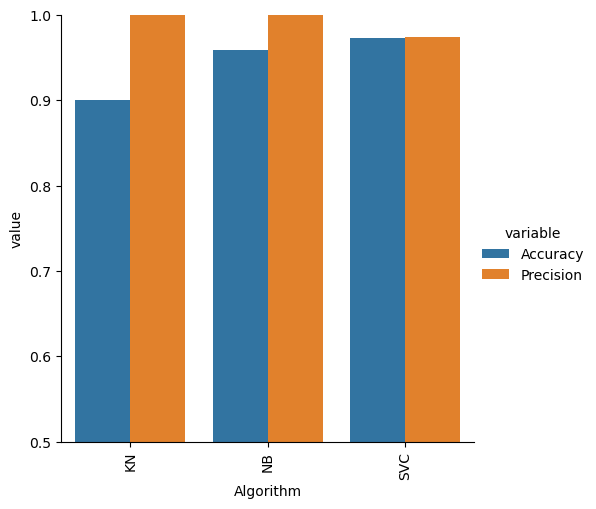

In [52]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [54]:
# now we try to improve the model by taking only 3000 most frequent words in tfidf vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [59]:
# now the precision is 1 and accuracy is increased to 97 percent

In [60]:
def detect_spam(new_sms):
    # Preprocess the input SMS
    transformed_sms = transform_text(new_sms)
    
    # Vectorize the transformed SMS using the same TF-IDF vectorizer
    new_sms_vector = tfidf.transform([transformed_sms]).toarray()
    
    # Predict whether the message is spam or not using Multinomial Naive Bayes
    prediction = mnb.predict(new_sms_vector)
    
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Not Spam"

In [61]:
new_sms = "Dear Customer, You Won 400% Bonus. Join GUJ vs MUM IPL Match on IndiBet. Win upto Rs.1,00,00,000(1Crore) Join Now - http://gmg.im/f0ZoPf NIra Gamings"
result = detect_spam(new_sms)
print(result)

Spam


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))